In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt



In [3]:
# Load the dataset
data = pd.read_csv('historical_data.csv.csv')  # Replace 'your_data.csv' with the actual file path
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



In [4]:

# Use 'Close' prices for prediction
y = data['Close']

# Split the data into training and testing sets
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]



C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 71.19393965678911


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


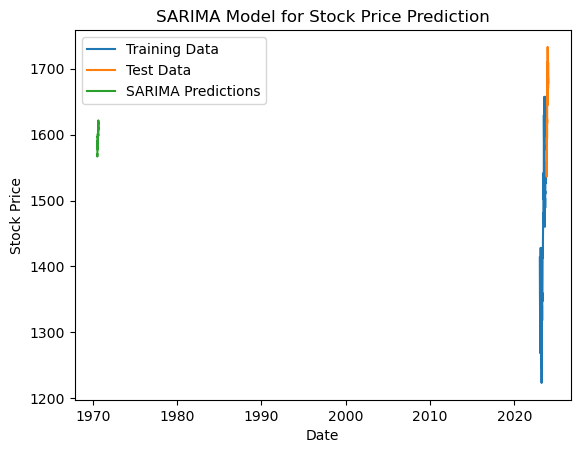

In [5]:
# Fit SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order with a yearly seasonality

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

# Forecast
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

# Evaluate the model
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the results
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(predictions, label='SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('SARIMA Model for Stock Price Prediction')
plt.legend()
plt.show()

In [6]:
# Assuming 'results' is the trained SARIMA model

# Forecast the next day
next_day_forecast = results.get_forecast(steps=1)

# Extract the forecasted value
forecasted_value = next_day_forecast.predicted_mean.iloc[0]

# Print the forecasted value
print(f'Forecasted Stock Price for the Next Day: {forecasted_value}')


Forecasted Stock Price for the Next Day: 1570.251069550151


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
import datetime

# Assuming 'results' is the trained SARIMA model

# Get the date of the latest observation in your dataset
latest_date = y.index[-1]

# Forecast the next day
next_day_forecast = results.get_forecast(steps=1)

# Extract the forecasted value
forecasted_value = next_day_forecast.predicted_mean.iloc[0]

# Calculate the date of the next day
next_day_date = latest_date + datetime.timedelta(days=1)

# Print the results
print(f'Date of Previous Observation: {latest_date.strftime("%Y-%m-%d")}')
print(f'Forecasted Stock Price for {next_day_date.strftime("%Y-%m-%d")}: {forecasted_value}')


Date of Previous Observation: 2024-01-10
Forecasted Stock Price for 2024-01-11: 1570.251069550151


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
